In [24]:
import h5py
import numpy as np
import matplotlib
import scipy
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import dedalus.public as d3
from dedalus.extras import plot_tools

In [25]:
snapname = '../2DEuler_snap/2DEuler_snap_s1.h5'
diagname = '../2DEuler_diag/2DEuler_diag_s1.h5'

with h5py.File(snapname, mode='r') as file:
    a_group_key = list(file.keys())
    print(a_group_key)
    
    print(file['scales'])
    print(list(file['scales']))
    print(file['tasks'])
    print(list(file['tasks']))

['scales', 'tasks']
<HDF5 group "/scales" (8 members)>
['constant', 'iteration', 'sim_time', 'timestep', 'wall_time', 'write_number', 'x_hash_d59679baad5bbe977384d18cb73897d07a757e19', 'y_hash_d59679baad5bbe977384d18cb73897d07a757e19']
<HDF5 group "/tasks" (2 members)>
['PSI', 'ZETA']


In [26]:
with h5py.File(snapname, mode='r') as file:
    
    ZETA_data = np.squeeze(np.array(file['tasks']['ZETA']))
    print(ZETA_data.shape)
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])
    
with h5py.File(diagname, mode='r') as file:
    
    KE_data = np.squeeze(np.array(file['tasks']['KE']))
    Ens_data = np.squeeze(np.array(file['tasks']['Enstrophy']))
    print(Ens_data.shape)
    
    diag_time_ary = np.array(file['scales']['sim_time'])
#     print(diag_time_ary)

(40, 512, 512)
[0.         0.09856933 0.20172909 0.29871324 0.39797124 0.50025783
 0.59856705 0.69854874 0.79911475 0.89863484 1.00212711 1.09747455
 1.20181606 1.30197773 1.40074409 1.498199   1.59937553 1.7017216
 1.80114852 1.90025318 2.00158985 2.09745455 2.20157939 2.30121034
 2.40040378 2.49906117 2.59845945 2.69765339 2.79980694 2.90237
 3.00171169 3.10222575 3.20226514 3.30193551 3.40243144 3.49926856
 3.59879618 3.70234962 3.80244705 3.90221003]
(397,)


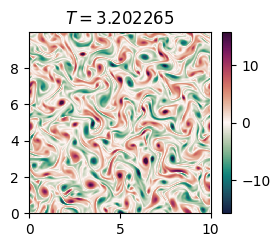

In [29]:
time_idx = 32

plt.figure(figsize=(5/1.7, 4/1.7))
# plt.figure(figsize=(11, 4))
# plt.subplot(1, 2, 1)
plt.pcolormesh(x,y,ZETA_data[time_idx,:,:].T, cmap=cmo.curl, vmin=-2.5*2*np.pi, vmax=2.5*2*np.pi)
# plt.pcolormesh(x,y,ZETA_data[time_idx,:,:].T/(2*np.pi), cmap=cmo.curl)
plt.axis('equal')
cbar = plt.colorbar();
# cbar.set_label("PV")
plt.title('$T=%f$' %sim_time_ary[time_idx])

# p.change_scales(1)
# plt.subplot(1, 2, 2)
# plt.pcolormesh(x[0:256],y[0:256],ZETA_data[time_idx,0:256,0:256].T/(2*np.pi), cmap=cmo.curl, vmin=-2.5, vmax=2.5)
# plt.axis('equal')
# cbar = plt.colorbar();
# cbar.set_label("PV/$2\pi$")
# plt.title('$2\pi T=%f$' %(sim_time_ary[time_idx]*2*np.pi))

plt.savefig('figs/PVbalanced.png', bbox_inches='tight', dpi=400)
plt.show()

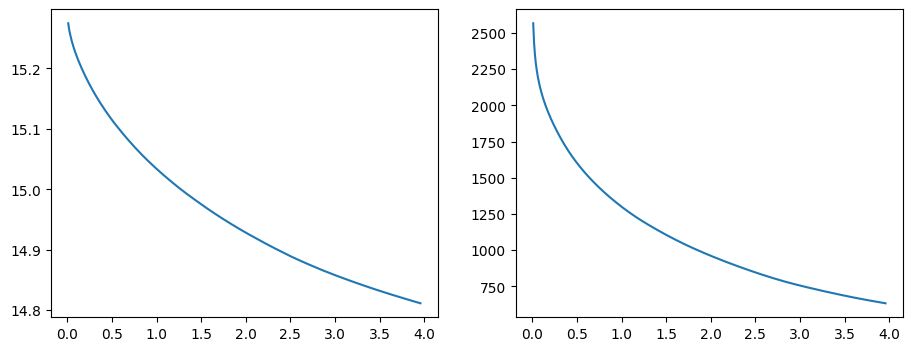

In [21]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.plot(diag_time_ary[1:],KE_data[1:])

# p.change_scales(1)
plt.subplot(1, 2, 2)
plt.plot(diag_time_ary[1:],Ens_data[1:])

# plt.savefig('figs/PVbalanced.png', bbox_inches='tight', dpi=400)
plt.show()